In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
df = pd.read_csv('protein_embeddings.csv')

In [ ]:
Lubna_New = pd.read_excel('external-val.xlsx')

In [ ]:
df.drop('Predicted_Interaction',axis=1,inplace=True)

In [ ]:
df.head()

,Protein,Residue,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,...,dim_1014,dim_1015,dim_1016,dim_1017,dim_1018,dim_1019,dim_1020,dim_1021,dim_1022,dim_1023
0,PB2,M,0.138675,0.114954,0.016611,-0.186882,0.357470,-0.031516,-0.093675,0.105905,...,-0.020714,-0.097386,0.172344,-0.161910,-0.194056,-0.016929,-0.065171,-0.071046,-0.131304,-0.105250
1,PB2,E,0.295498,0.252771,-0.043344,-0.075328,0.243561,-0.072011,0.037045,-0.073867,...,0.104960,0.008959,0.285269,-0.134248,-0.076227,-0.148178,0.020548,-0.226756,-0.149339,0.093640
2,PB2,R,0.213702,-0.026247,0.022503,-0.128081,0.247981,-0.098613,0.031823,-0.005455,...,0.042799,0.025040,0.161958,-0.132909,-0.057627,-0.103322,-0.112413,-0.053925,-0.189408,-0.114455
3,PB2,I,0.153882,0.212552,-0.031012,-0.273558,0.297250,-0.139223,-0.011403,-0.062481,...,0.100236,0.056037,0.295270,-0.202785,-0.063105,-0.154799,-0.233887,-0.089071,-0.092282,0.049376
4,PB2,K,0.086637,0.087466,0.014072,-0.136910,0.015821,-0.044122,0.159113,-0.040468,...,0.005490,-0.044764,0.198593,-0.229706,0.016088,-0.045163,-0.070646,-0.179592,-0.176363,-0.181344


In [ ]:
Predictions = Lubna_New.fillna(0)
Predictions.head()

,Residue_Index,PDBID,Rel-SASA,Amino_Acid,Arginine_Propensity,Tryptophan_Propensity,Tyrosine_Propensity,Valine_Propensity,Serine_Propensity,Methionine_Propensity,Threonine_Propensity,Leucine_Propensity,Secondary_Enum,LUBNA,LUBNA-NEW
0,1,PB2,0.783568,M,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.942029,1.0,0.0
1,2,PB2,0.742773,E,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.942029,1.0,0.0
2,3,PB2,0.592849,R,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.130701,1.0,0.0
3,4,PB2,0.516733,I,0.142857,0.0,0.0,0.0,0.0,0.142857,0.0,0.142857,0.130701,1.0,0.0
4,5,PB2,0.554655,K,0.285714,0.0,0.0,0.0,0.0,0.000000,0.0,0.142857,0.130701,1.0,0.0


In [ ]:
df['Interaction']= Predictions['LUBNA-NEW']
df.head()

,Protein,Residue,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,...,dim_1015,dim_1016,dim_1017,dim_1018,dim_1019,dim_1020,dim_1021,dim_1022,dim_1023,Interaction
0,PB2,M,0.138675,0.114954,0.016611,-0.186882,0.357470,-0.031516,-0.093675,0.105905,...,-0.097386,0.172344,-0.161910,-0.194056,-0.016929,-0.065171,-0.071046,-0.131304,-0.105250,0.0
1,PB2,E,0.295498,0.252771,-0.043344,-0.075328,0.243561,-0.072011,0.037045,-0.073867,...,0.008959,0.285269,-0.134248,-0.076227,-0.148178,0.020548,-0.226756,-0.149339,0.093640,0.0
2,PB2,R,0.213702,-0.026247,0.022503,-0.128081,0.247981,-0.098613,0.031823,-0.005455,...,0.025040,0.161958,-0.132909,-0.057627,-0.103322,-0.112413,-0.053925,-0.189408,-0.114455,0.0
3,PB2,I,0.153882,0.212552,-0.031012,-0.273558,0.297250,-0.139223,-0.011403,-0.062481,...,0.056037,0.295270,-0.202785,-0.063105,-0.154799,-0.233887,-0.089071,-0.092282,0.049376,0.0
4,PB2,K,0.086637,0.087466,0.014072,-0.136910,0.015821,-0.044122,0.159113,-0.040468,...,-0.044764,0.198593,-0.229706,0.016088,-0.045163,-0.070646,-0.179592,-0.176363,-0.181344,0.0


# Getting the dependent and Independent features as X and y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
X = df[df.columns[2:-1]].values
X.shape

(3322, 1024)

In [ ]:
X

array([[ 0.13867523,  0.11495434,  0.01661059, ..., -0.07104592,
        -0.13130371, -0.10525029],
       [ 0.2954981 ,  0.2527705 , -0.04334373, ..., -0.22675605,
        -0.14933859,  0.09364036],
       [ 0.21370208, -0.02624705,  0.02250302, ..., -0.05392532,
        -0.18940753, -0.11445538],
       ...,
       [ 0.26106915,  0.1971069 , -0.2205918 , ..., -0.09332349,
        -0.11929336,  0.06442736],
       [ 0.20894983,  0.04886873, -0.12859339, ..., -0.04567585,
         0.00728795, -0.10118937],
       [ 0.08272641,  0.17564397, -0.34890774, ..., -0.04044129,
         0.02402879,  0.0062374 ]])

In [ ]:
y = df.iloc[:, -1].values  # As a NumPy array

In [ ]:
y.shape

(3322,)

Define the Train Test Split. The test data will be 20%

---



---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2657, 1024)

In [ ]:
y_train.shape

(2657,)

Standardization of Input features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# X_train = X_train.T
X_train.shape

(2657, 1024)

In [ ]:
y_test.shape
X_test.shape

(665, 1024)

# ANN model

In [ ]:

model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(1024,)),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout for regularization
    keras.layers.Dense(256, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),  # Third hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to 0 or 1
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8095 - loss: 0.4799 - val_accuracy: 0.9113 - val_loss: 0.2359
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9345 - loss: 0.1847 - val_accuracy: 0.9248 - val_loss: 0.2001
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9581 - loss: 0.1073 - val_accuracy: 0.9474 - val_loss: 0.1292
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9683 - loss: 0.0795 - val_accuracy: 0.9489 - val_loss: 0.1630
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9782 - loss: 0.0676 - val_accuracy: 0.9624 - val_loss: 0.1448
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9899 - loss: 0.0292 - val_accuracy: 0.9549 - val_loss: 0.1529
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9912 - loss: 0.0225 - val_accuracy: 0.9519 - val_loss: 0.1743
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9927 - loss: 0.0220 - val_accuracy: 0.9489 - val_loss: 0.

# Confusion Matrix and it's Heat Map

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[509   6]
 [ 20 130]]


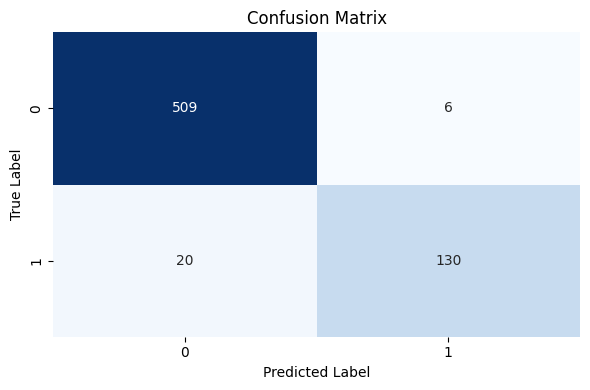

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



In [ ]:
import pickle

with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
import pickle

with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

print(model)


<Sequential name=sequential, built=True>


In [ ]:
new_data = pd.read_csv('external_training_data_protein_embeddings.csv')
X_new = new_data.iloc[:, 2:].values
X_new.shape

(27080, 1024)

In [ ]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)


predictions = model.predict(X_new)

class_predictions = (predictions > 0.5).astype(int)  # If probability > 0.5, class 1, else class 0

new_data['class_predictions'] = class_predictions

new_data.to_csv('new_data_with_class_predictions.csv', index=False)

print(class_predictions)

847/847 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
new_data.head()

,Protein,Residue,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,...,dim_1016,dim_1017,dim_1018,dim_1019,dim_1020,dim_1021,dim_1022,dim_1023,predictions,class_predictions
0,P|A8C8W5|M1,M,0.373186,0.036259,-0.046038,-0.258318,0.242212,-0.017365,-0.124055,0.074127,...,0.288992,-0.027814,-0.172810,-0.179448,0.017597,-0.115983,-0.102364,-0.151332,0.369446,0
1,P|A8C8W5|M1,S,0.252360,-0.138719,0.055362,-0.126575,0.318842,-0.005334,-0.095021,0.098189,...,0.089142,-0.020255,-0.012366,-0.051954,0.090847,0.066172,-0.098372,0.003973,0.165186,0
2,P|A8C8W5|M1,L,0.395326,-0.000684,-0.101916,-0.062547,0.134316,-0.016813,0.053718,-0.079879,...,0.112761,-0.044851,0.046833,-0.155468,0.014698,0.161323,0.011293,0.004810,0.306167,0
3,P|A8C8W5|M1,L,0.281906,0.070280,-0.216720,-0.030535,0.030702,0.093824,-0.010491,0.035791,...,0.249769,-0.118392,-0.170410,-0.050510,-0.024282,0.185554,-0.037229,-0.098391,0.118625,0
4,P|A8C8W5|M1,T,0.193628,0.088433,-0.133629,-0.194527,0.122745,-0.016847,-0.068816,0.111316,...,0.247965,-0.098325,-0.181288,-0.006097,0.091324,0.094155,-0.000206,0.113201,0.073687,0


In [ ]:
data = pd.read_csv('new_data_with_class_predictions.csv')

In [ ]:
Output = data.groupby('Protein')['class_predictions'].apply(lambda x: ''.join(map(str, x))).to_dict()

In [ ]:
Output

{'P|A8C8W5|M1': '000000000000000000010100010101010000000000001111110111110111110111001100111000001011100111110001110001100000100100011111101111101001000100010111111111101111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P03427|PB2': '00000000000000000000000000000000010000000000000000000000000000000000000010001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001011110000011011111111001000101111111011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011111011100111100100010111101111111011110100110000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
output = {'P|A8C8W5|M1': '000000000000000000010100010101010000000000001111110111110111110111001100111000001011100111110001110001100000100100011111101111101001000100010111111111101111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P03427|PB2': '000000000000000000000000000000000100000000000000000000000000000000000000100010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010111100000110111111110010001011111110111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111110111001111001000101111011111110111101001100000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000001111111111111101110000',
 'P|P03428|PB2': '000000000000000000000000000000000100000000000000000000000000000000000000100010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010111100100110111111110010001011111110110000000000000000000000000000000000000000000100000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111110111001111001000101111010111110111100001000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000001111111111111111100000',
 'P|P03430|RDRP': '1011111111111111111101110011111011101100111111011111111111111111111111111111111111100110111011101101111011110100101100110101011001001101110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100101010111100111111111111010111111111101111101000111011001111111011000101111011111111111111111111111111111111111001100011101111111111111111111111111111111111111111111111111111111111111111111111111011101111111111111111111111111111111111111100000010011111100111110',
 'P|P03431|RDRP': '1011111111001110111001110011111010101100111111011011111111101111101101111111101101100100110010101101101000010000101100100001011000001001010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100101010011000111101111001010111101110000101101000101011001111101010000000010011011111110111111111111101101001111000100010101111011111111111111011111111111111111111111111111111111010111111101110111001101111111111111111011011111111111111011100000010011110100111110',
 'P|P03433|PA': '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000011101111111111111101101111111111111111111111111',
 'P|P03452|HEMA': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100100111111100101100000000000000000000010000000000000000000111111111110',
 'P|P03454|HEMA': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000010100110111111100101100000000001000000000010000000000000000000111111111110',
 'P|P03466|NCAP': '001110001101100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P03468|NRAM': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000010000000000100000000000',
 'P|P03470|NRAM': '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000010000000000100000000000',
 'P|P03485|M1': '000000000000000000010100010101010000000000001111110111110111110111001100111000001010100111110001100001100000110100111111101111101001000100010111111111101111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P03496|NS1': '00000000000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P03508|NEP': '0000000000000100000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P05777|M1': '000000000000000000000100010101010000000000001111110111110111110111001100111000001010100111110001100001100000110100111111101111101001000100010111011111101011110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P05780|M2': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P06821|M2': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P0C0U1|PB1F2': '000000000000000000000000000000000000000000000000000000000000000000000000000000000000001',
 'P|P15659|PA': '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000011101111111111111101101111111111111111111111111',
 'P|P15682|NCAP': '101100001101100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|P30910|NS1': '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000',
 'P|P68043|NCAP': '101100101101100100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|Q07FI1|NCAP': '001110101101101101100000000000000000000000000000000000000000000000000000000100000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|Q0HD54|NS1': '000000000000000000000000000000001000001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|Q20MH0|PB1F2': '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|Q82506|NS1': '00000000000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|Q89733|NEP': '0000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'P|Q99AU3|NS1': '00000000000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|A4ZNP8|A4ZNP8': '001110001101100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|A4ZNQ2|A4ZNQ2': '0000000000000100000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|A4ZNQ3|A4ZNQ3': '00000000000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|A4ZNR3|A4ZNR3': '00000000000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|A7UPX0|A7UPX0': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000110110100000000000000000000000000000000000000000000000000001111000',
 'R|B2BTY8|B2BTY8': '1111111111111111111101111111111111111110111111111111111111111111111111111111111111111111111111111111111011110101111111111111111111011111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000101111110111101111111111111110111111111101111101100111011011111111111100111111011111111111111111111111111111111111111101111111111111111111111111111111111111111111111111111111111111111111111111111111011111111111111111111111111111111111111111110101110111111111111111',
 'R|B2BUI7|B2BUI7': '00000100000000000000000000000000100000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|B4UPA8|B4UPA8': '000000000000000000010100010101010000000000001111110111110111110111001100111000001010100111110001100001100000110100111111101111101001000100010111111111101111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|B4UPB1|B4UPB1': '0000000000000100000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|B4UPB3|B4UPB3': '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000011101111111111111101101111111111111111111111111',
 'R|B4UPB6|B4UPB6': '000000000000000000000000000000000100000000000000000000000000000000000000100010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010111100100110111111110010001011111110110000000000000000000000000000000000000000000100000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111110111001111001000101111010111110111100001000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000001111111111111111100000',
 'R|B4URE7|B4URE7': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100100111111100101100000000001000000000010000000000000000000111111111110',
 'R|B4URF0|B4URF0': '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000010000000000100000000000',
 'R|B4URF6|B4URF6': '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|B4URF7|B4URF7': '000000000000000000000000000000000100000000000000000000000000000000000000100010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010111100000110111111110010001011111110111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111110111001111001000101111011111110111101001100000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111111111111101110000',
 'R|C3W5S7|C3W5S7': '000000000000000000000000000000000001001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|C3W6D7|C3W6D7': '101100001101100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|C5E519|C5E519': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|C5E522|C5E522': '101100001101100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|C5E524|C5E524': '000000000000000000000000000000000001001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|C5E526|C5E526': '1111111111111111111111111011111011101100111111111111111111111111111111111111111111111111111111111111111011110101101110111101111111001101110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000110111110111101111111111111111111111111101111111111111111011111111111100111111011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110111111111111111',
 'R|C5E527|C5E527': '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111101100111111111110010001011111111110000000000000000000000000000000000000000000100000000000000000000000000000000000001000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011111111001111100010111111011111110111101001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001011101001111001100000',
 'R|C8XKY2|C8XKY2': '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111101100111111111110010001011111111110000000000000000000000000000000000000000000100000000000000000000000000000000000001000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011111111001111100010111111011111110111101001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001011100000111001100000',
 'R|C9S3S8|C9S3S8': '001110101101101101100000000000000000000000000000000000000000000000000000000100000011000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|D9J353|D9J353': '000000000000101000',
 'R|H8XZX4|H8XZX4': '0000000000000100000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|I6TAG8|I6TAG8': '00000000000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|I7CAR2|I7CAR2': '00000000000000000000000000000000100000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|Q194T2|Q194T2': '00000000000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|Q1I2B2|Q1I2B2': '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000011101111111111111101101111111111111111111111111',
 'R|Q1K9G9|Q1K9G9': '000000000000000000000100010101010000000000001111110111110111110111001100111000001010100111110001100001100000110100111111101111101001000100010111011111101011110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|Q1K9H2|Q1K9H2': '101100001000100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|Q1K9H5|Q1K9H5': '1011111111111110111101110011111011101100111111011111111111111111101101111111101111100110111011101101101011110100101100100101011001001101110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100101010111100111101111011010111101110101111101000111011001111111010000100110011111111111111111111111101111111111001100011101111111111111111111111111111111111111111111111111111111110111111101111111011101111111111111111111111111111111111011100000010011111100111110',
 'R|Q1K9H6|Q1K9H6': '000000000000000000000000000000000100000000000000000000000000000000000000100010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010111100000110111111110010001011111110111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111110111001111001000101111011111110111101001100000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000001111111111111101110000',
 'R|Q20MH3|Q20MH3': '00000000000000000000000000000000000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|Q20MH4|Q20MH4': '0000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|Q20MH8|Q20MH8': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|Q67020|Q67020': '000000000000000000000000000000000000000000000000000000001000000000000011001000011010000001101',
 'R|Q8JR21|Q8JR21': '10110010110110010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000',
 'R|Q9DLK6|Q9DLK6': '001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'R|Q9WPI5|Q9WPI5': '0000001000000000000110000101000000000010000000000000001',
 'R|T2AAS6|T2AAS6': '001110001101100100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000'}

In [ ]:
import json
with open('Protein_Vector.json', 'w') as file:
  json.dump(output, file)